In [38]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

# Load the Tips dataset from Seaborn
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


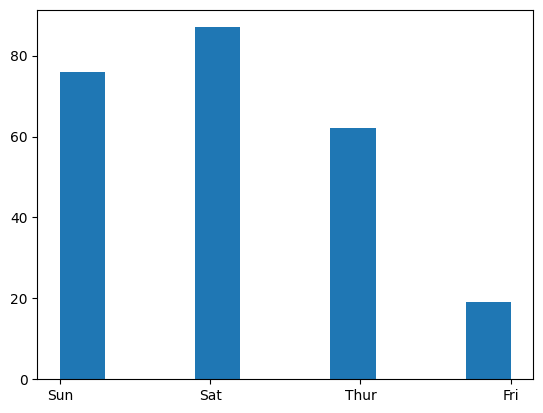

In [50]:
plt.hist(tips['day'])
plt.show()

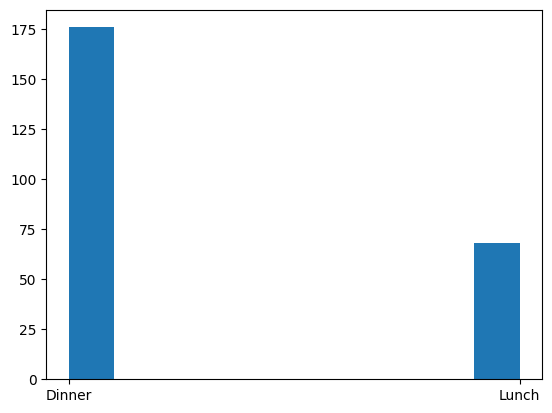

In [49]:
plt.hist(tips['time'])
plt.show()

In [33]:
tips[['total_bill', 'tip', 'size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [36]:
X = tips[['total_bill', 'size']] # Features
y = tips['tip']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X = tips.drop(['tip'], axis = 1) # Features
X = pd.get_dummies(X)
y = tips['tip']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.7033566017436106
R2 Score: 0.43730181943482493


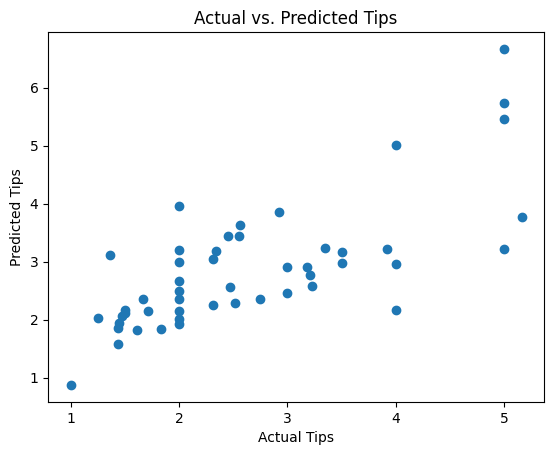

In [46]:

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Plotting the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs. Predicted Tips')
plt.show()

Mean Squared Error: 0.9536518812992433
R2 Score: 0.23706100551360143


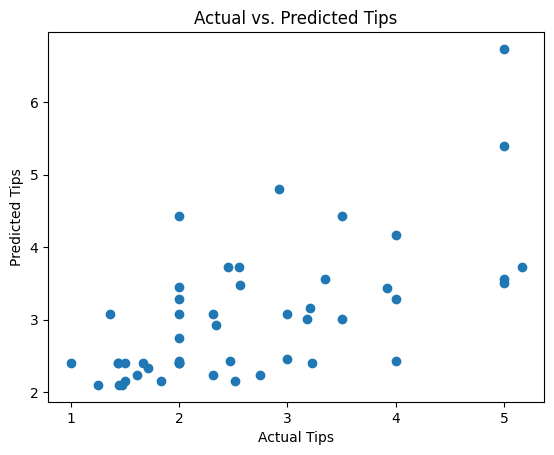

In [47]:
adaboost_reg = AdaBoostRegressor(n_estimators=50, random_state=42)

# Train the AdaBoost regressor
adaboost_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Plotting the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs. Predicted Tips')
plt.show()